In [2]:
from model.modelwrapper import ModelWrapper
from utils.open_file import open_file
import matplotlib.pyplot as plt
import numpy as np

In [3]:
m = ModelWrapper('unet.pt',2,2)

In [4]:
img = m.denoise_img('/home/stephan/Desktop/glutamate_data/martin_23-12-21/Glu_Cav2-1_+47_37a_R1-2.nd2')

denoise: 100%|██████████| 2094/2094 [04:34<00:00,  7.62it/s]


In [5]:
img_noisy = open_file('/home/stephan/Desktop/glutamate_data/martin_23-12-21/Glu_Cav2-1_+47_37a_R1-2.nd2')

# Represent one frame

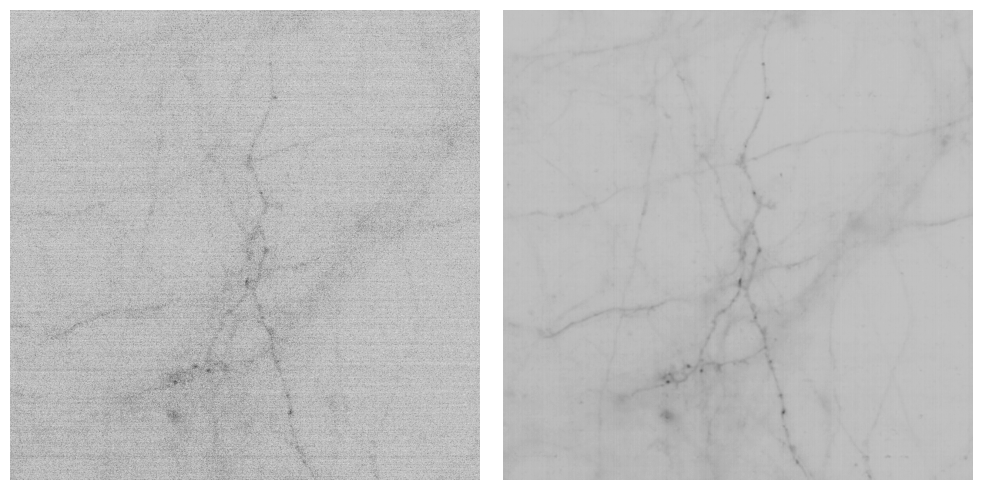

In [6]:

frame = 0
fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
vmin = np.min([np.min(img_noisy[frame+3]),np.min(img[frame])])
vmax = np.max([np.max(img_noisy[frame+3]),np.max(img[frame])])
ax[0].imshow(img_noisy[frame+3],cmap='Greys',vmin=vmin,vmax=vmax)
ax[1].imshow(img[frame],cmap='Greys',vmin=vmin,vmax=vmax)

for ori in ['top','bottom','left','right']:
    ax[0].spines[ori].set_visible(False)
    ax[1].spines[ori].set_visible(False)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[0].set_yticks([])
ax[1].set_yticks([])

plt.tight_layout()

# Find a responding synapse

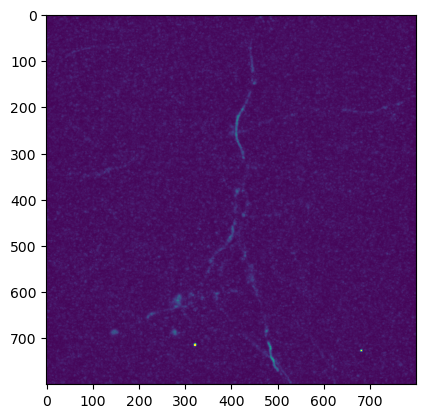

In [11]:
img_max_proj = np.max(img,axis=0) - np.mean(img,axis=0)
plt.imshow(img_max_proj,vmax=100)

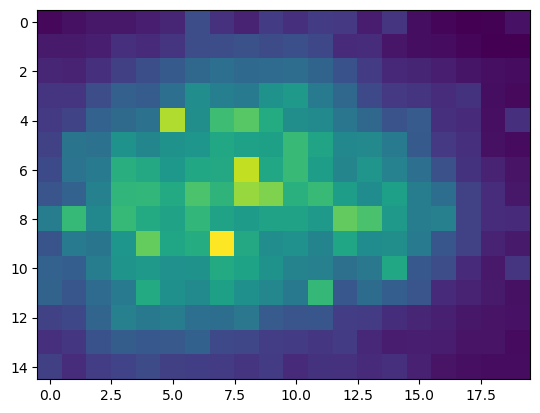

In [31]:
plt.imshow(img_max_proj[680:695,140:160])

# Trace

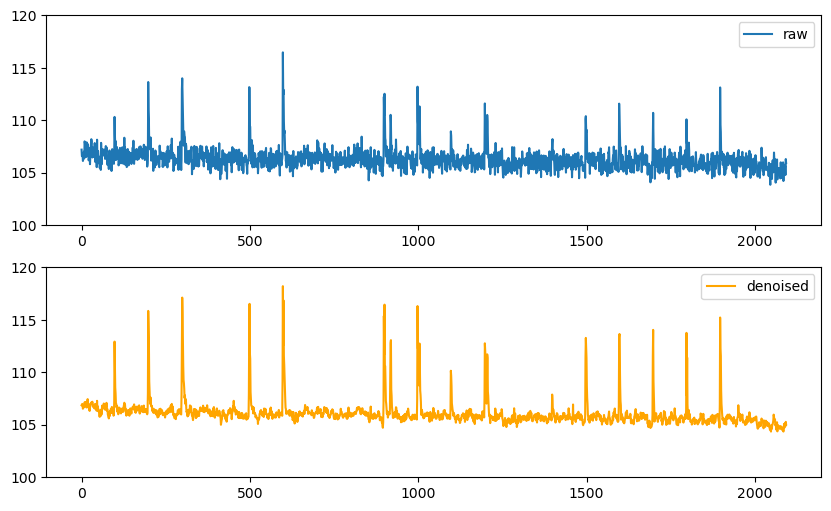

In [34]:
y_start,y_end,x_start,x_end = [680,695,140,160]
fig,ax = plt.subplots(2,1)
fig.set_size_inches(10,6)
ax[0].plot(img_noisy[3:-3,y_start:y_end,x_start:x_end].mean(axis=(1,2)),label='raw')
ax[0].set_ylim(100,120)
ax[1].plot(img[:,y_start:y_end,x_start:x_end].mean(axis=(1,2)),c='orange',label='denoised')
ax[1].set_ylim(100,120)
ax[0].legend()
ax[1].legend()